In [35]:
import pandas as pd
import numpy as np

In [36]:
df=pd.read_csv("Advertising.csv")
df.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


### Checking for null values

In [37]:
df.isnull().sum()

Unnamed: 0    0
TV            0
radio         0
newspaper     0
sales         0
dtype: int64

In [38]:
df.columns

Index(['Unnamed: 0', 'TV', 'radio', 'newspaper', 'sales'], dtype='object')

In [39]:
df.shape

(200, 5)

In [40]:
df.describe()

,Unnamed: 0,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


In [41]:
df.nunique()

Unnamed: 0    200
TV            190
radio         167
newspaper     172
sales         121
dtype: int64

In [42]:
df.dtypes

Unnamed: 0      int64
TV            float64
radio         float64
newspaper     float64
sales         float64
dtype: object

In [43]:
df=df.drop("Unnamed: 0",axis=1)
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [9]:
import seaborn as sns

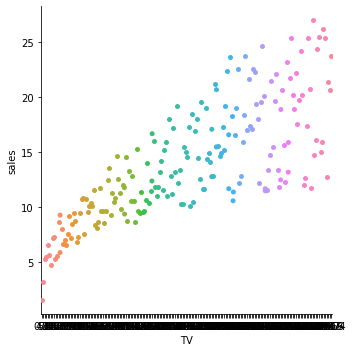

In [44]:
sns.catplot(x='TV',y='sales',data=df)

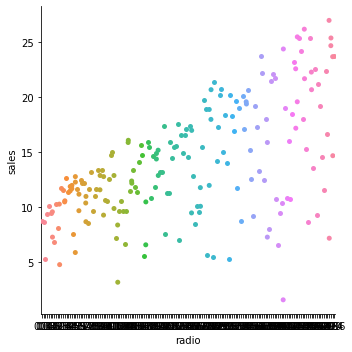

In [45]:
sns.catplot(x='radio',y='sales',data=df)

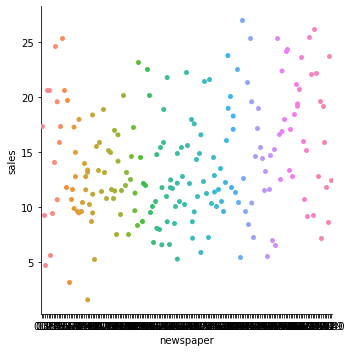

In [46]:
sns.catplot(x='newspaper',y='sales',data=df)

By observing the above graphs,the graphs 1,2 are neatly aligned but the 3rd grphs seems to be scattered so much.

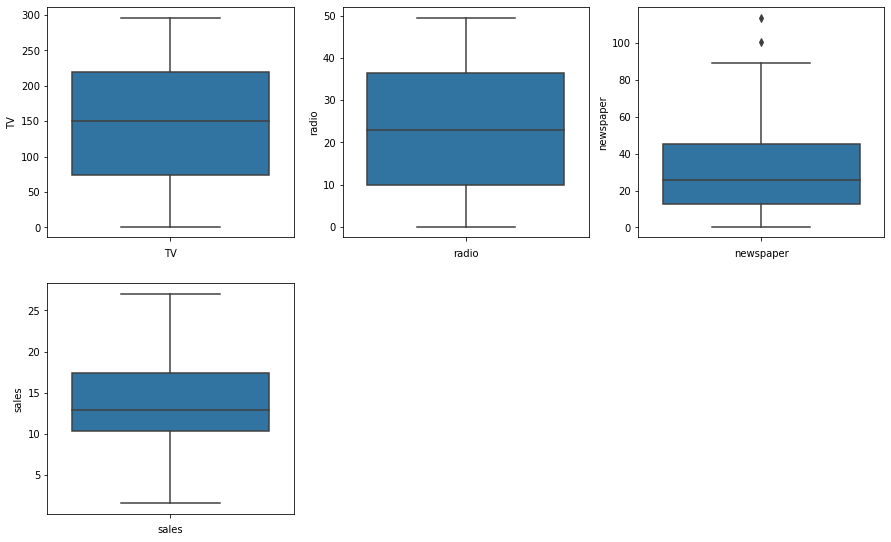

In [47]:
#Visualize the outliers using boxplot
import matplotlib.pyplot as plt
plt.figure(figsize=(15,50))
graph=1
for column in df:
    if graph<=30:
        ax=plt.subplot(10,3,graph)
        sns.boxplot(df[column],orient='v')
        plt.xlabel(column,fontsize=10)
    graph+=1
plt.show()

By observing the above graph we see there are few outliers in newspaper

In [48]:
#for removing outliers implementing zscore
from scipy.stats import zscore
z_score=zscore(df[['newspaper']])
abs_z_score=np.abs(z_score)

filtering_entry=(abs_z_score<3).all(axis=1)

df=df[filtering_entry]

df.describe()

,TV,radio,newspaper,sales
count,198.000000,198.000000,198.000000,198.000000
mean,146.688384,23.130808,29.777273,13.980808
std,85.443221,14.862111,20.446303,5.196097
min,0.700000,0.000000,0.300000,1.600000
25%,74.800000,9.925000,12.650000,10.325000
50%,149.750000,22.400000,25.600000,12.900000
75%,218.475000,36.325000,44.050000,17.375000
max,293.600000,49.600000,89.400000,27.000000


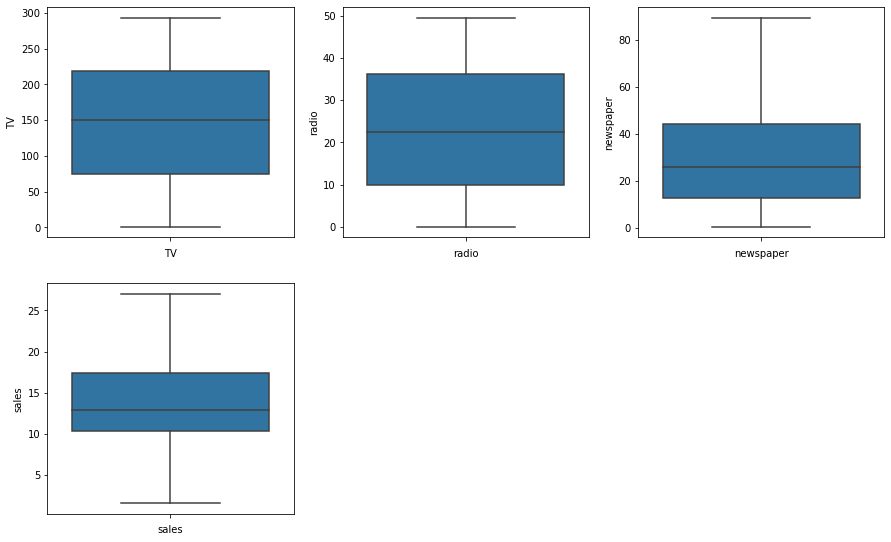

In [49]:
#Visualize the outliers using boxplot
import matplotlib.pyplot as plt
plt.figure(figsize=(15,50))
graph=1
for column in df:
    if graph<=30:
        ax=plt.subplot(10,3,graph)
        sns.boxplot(df[column],orient='v')
        plt.xlabel(column,fontsize=10)
    graph+=1
plt.show()

Now as observed there are no outliers,we are good to go

Correlation

In [50]:
df.corr()

,TV,radio,newspaper,sales
TV,1.000000,0.051978,0.049771,0.779121
radio,0.051978,1.000000,0.346364,0.576748
newspaper,0.049771,0.346364,1.000000,0.219555
sales,0.779121,0.576748,0.219555,1.000000


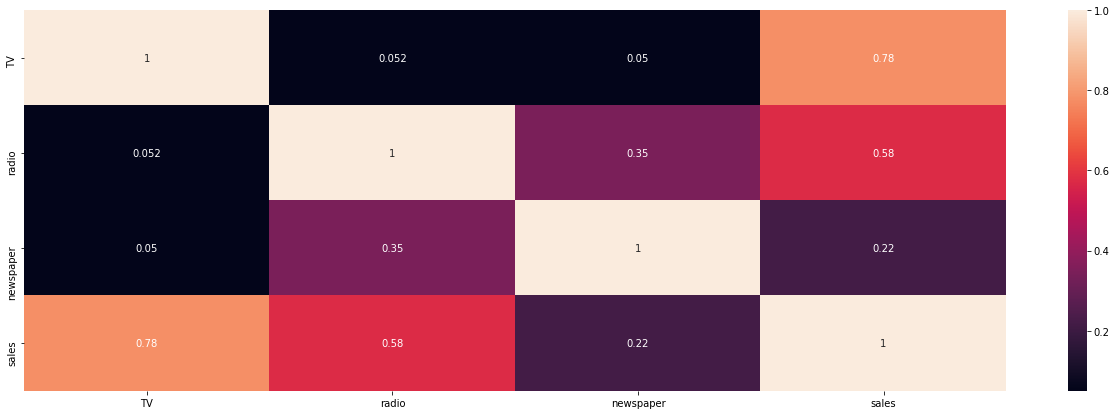

In [51]:
#Now lets plot heatmap based on the correlation
plt.figure(figsize=(22,7))
sns.heatmap(df.corr(),annot=True)

Everything seems good

In [52]:
df.skew()

TV          -0.082332
radio        0.114842
newspaper    0.650112
sales        0.407130
dtype: float64

As setting the range of of +/-0.5 there is no skewness

In [53]:
df.shape

(198, 4)

In [54]:
Data_loss=((200-198)/4177)*100
Data_loss

0.047881254488867604

### Multiple Regression

sales = Bo+B1TV + B2 radio+B3*newspapers+E

In [56]:
#Multiple Linear Regression
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
features = ["TV","radio","newspaper"]
x=df[features]
y=df.sales
model=lm.fit(x,y)
print (" Model coefficients are: ")
print ( model.coef_)
xpredicted = model.predict(x)
print("R-squared of the model")
print(model.score(x,y))


 Model coefficients are: 
[ 0.04569034  0.18855047 -0.00117766]
R-squared of the model
0.8953917183024752


### Cross-Validation

In [64]:
#cross validation
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
features = ["TV","radio","newspaper"]
x=df[features]
y=df.sales

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.25,random_state=0)
print("The length of tranning size is %d" % len(X_train))
print("The length of test size is %d " % len(X_test))
model = lm.fit(X_train,y_train)
print("The R-squared value of the model is %.2f" % model.score(X_test,y_test))

The length of tranning size is 148
The length of test size is 50 
The R-squared value of the model is 0.92


In [66]:
pred_test=lm.predict(X_test)
pred_test

array([13.94883141,  7.34343318, 16.85024368, 12.11985798, 10.31363072,
       15.87389799, 13.02218046, 14.48960609, 11.02939854, 16.0151057 ,
       22.84708206,  4.50657856, 14.63225056, 15.10092361, 13.15168238,
       11.87450944,  7.35720088, 11.28058613, 10.01596085, 17.28458841,
       20.79469039,  9.43997415,  8.9533758 , 12.38548614,  9.33146006,
       16.00868346, 12.15359972, 20.45828315, 21.40402617, 15.03994291,
       23.16973211, 20.87313577,  9.71920857, 23.99511936, 16.29883021,
        7.94994889, 21.70134219, 13.37568538, 11.75565084,  9.10067399,
       19.20167218, 24.56638869, 16.75142364, 16.5355503 , 23.11806603,
       20.58242625,  3.57001665,  8.8173416 , 12.55728611,  6.10040077])

In [68]:
from sklearn.metrics import r2_score
print(r2_score(y_test,pred_test))

0.9169198405610239


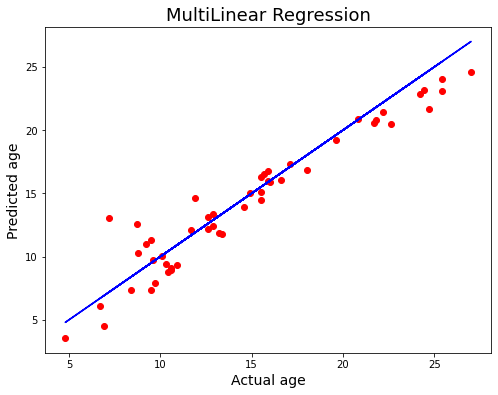

In [69]:
plt.figure(figsize=(8,6))
plt.scatter(x=y_test,y=pred_test,color='r')
plt.plot(y_test,y_test,color='b')
plt.xlabel("Actual age",fontsize=14)
plt.ylabel("Predicted age",fontsize=14)
plt.title("MultiLinear Regression",fontsize=18)
plt.show()

The red dots are near to the regression line.This means its good model

In [58]:
#Testing 10-times the linear regression model for the Advertising data set.
for i in range(0,10):
    X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.25)
    model = lm.fit(X_train,y_train)
    print(model.score(X_test,y_test))

0.9303476363341325
0.9044883624923333
0.8784630556941373
0.9224033979721629
0.9061658780566807
0.822137060679527
0.875669434759832
0.8794202311102572
0.9110233237200137
0.8870467860581736


K-Fold Cross Validation

In [60]:
#K- Fold Cross Validation
from sklearn.model_selection import KFold
import numpy as np

lm = LinearRegression()
features = ["TV","radio","newspaper"]
x=df[features]
y=df.sales

kf = KFold(n_splits=10)
scores=[]
for train,test in kf.split(x,y):
    model = lm.fit(x.values[train],y.values[train])
    score = model.score(x.values[test],y.values[test])
    print(score)
    scores.append(score)
    
print("The mean score for %d-fold cross validation is %.2f" % (kf.get_n_splits(),np.mean(np.array(scores))))

0.8785990869831636
0.8562825661180878
0.9283756273762976
0.8971225154351251
0.9202129274242854
0.9307591070896708
0.7613808573154314
0.9097780000737598
0.8424213155339795
0.9274105903736486
The mean score for 10-fold cross validation is 0.89


Cross Validation

In [62]:
#cross_val_score method
lm = LinearRegression()
features = ["TV","radio","newspaper"]
x=df[features]
y=df.sales

from sklearn.model_selection import RepeatedKFold
rkf = RepeatedKFold(n_splits=4,n_repeats=2,random_state=True)

from sklearn.model_selection import cross_val_score
scores = cross_val_score(lm,x,y,cv=rkf)
print(scores)
print("Average score %.2f" % scores.mean())

[0.90159082 0.90151659 0.90923473 0.82970833 0.86745028 0.88922298
 0.9024047  0.87801905]
Average score 0.88


### Regularization

In [71]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

In [72]:
from sklearn.linear_model import Lasso
parameters={'alpha':[.0001,.001,.01,.1,1,10],'random_state':list(range(0,10))}
ls=Lasso()
clf=GridSearchCV(ls,parameters)
clf.fit(X_train,y_train)
print(clf.best_params_)

{'alpha': 1, 'random_state': 0}


In [73]:
ls=Lasso(alpha=1,random_state=0)
ls.fit(X_train,y_train)
ls.score(X_train,y_train)
pred_ls=ls.predict(X_test)

lss=r2_score(y_test,pred_ls)
lss

0.9184356111285339

In [75]:
cv_score=cross_val_score(ls,x,y,cv=5)
cv_mean=cv_score.mean()
cv_mean

0.8866337793995942

In [77]:
import pickle
model=LinearRegression()
model.fit(X_train, y_train)
pickle.dump(model, open('advertising.pkl','wb'))

In [78]:
# Loading model to compare the results
loaded = pickle.load(open('advertising.pkl','rb'))

In [79]:
y_predicted = model.predict(X_test)
y_predicted

array([13.94883141,  7.34343318, 16.85024368, 12.11985798, 10.31363072,
       15.87389799, 13.02218046, 14.48960609, 11.02939854, 16.0151057 ,
       22.84708206,  4.50657856, 14.63225056, 15.10092361, 13.15168238,
       11.87450944,  7.35720088, 11.28058613, 10.01596085, 17.28458841,
       20.79469039,  9.43997415,  8.9533758 , 12.38548614,  9.33146006,
       16.00868346, 12.15359972, 20.45828315, 21.40402617, 15.03994291,
       23.16973211, 20.87313577,  9.71920857, 23.99511936, 16.29883021,
        7.94994889, 21.70134219, 13.37568538, 11.75565084,  9.10067399,
       19.20167218, 24.56638869, 16.75142364, 16.5355503 , 23.11806603,
       20.58242625,  3.57001665,  8.8173416 , 12.55728611,  6.10040077])